<a href="https://colab.research.google.com/github/gurpreet0610/celebrity_face_detection/blob/master/CelebFaceDetectionUsingTransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import dlib
from keras.models import load_model
import numpy as np
from numpy import expand_dims
import math
from google.colab.patches import cv2_imshow

Using TensorFlow backend.


In [0]:
face_detector = dlib.cnn_face_detection_model_v1("Data/model/mmod_human_face_detector.dat")
model = load_model('Data/model/facenet_keras.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
def get_image_face(img):
    
    faces = face_detector(img, 1)
    crop_faces=[]
    for face in faces:
        crop_faces.append(img[face.rect.top():face.rect.bottom(),
                       face.rect.left():face.rect.right()])
    return crop_faces[0]

In [0]:
def generate_embeddings(face_pixels):
    face_pixels=cv2.resize(face_pixels,(160,160))
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform face into one sample
    samples = expand_dims(face_pixels, axis=0)
    # make prediction to get embedding
    yhat = model.predict(samples)
    return yhat[0]

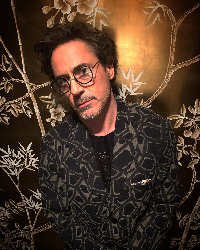

In [0]:
# Example image
img = cv2.imread("/content/drive/My Drive/Datasets/Dataset/robertdownejr/robertdowneyjr_31913316_225277851571397_8189716001621803008_n.jpg")
imgc= cv2.resize(img,(200,250))
cv2_imshow(imgc)

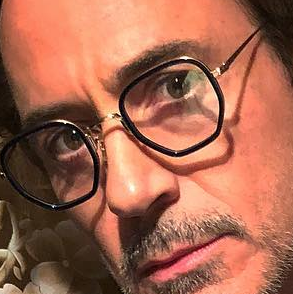

In [0]:
face=get_image_face(img)
cv2_imshow(face)

In [0]:
embd=generate_embeddings(face)
embd

array([-1.9190937 , -0.79804385,  0.8605492 , -0.8142284 ,  0.23272502,
       -0.21661519, -1.0788497 ,  0.68262875, -0.41700843, -0.40696126,
        2.47691   ,  0.5027365 ,  0.4109053 , -0.4383325 ,  0.20649318,
        2.2868416 ,  0.28713977,  0.7071424 , -0.00969519,  2.0278614 ,
        1.3204827 , -1.3862435 , -0.13888651,  0.02136657, -0.16753873,
        0.53283405,  0.41835317,  1.4589471 ,  0.0771332 ,  0.7224228 ,
       -0.24611843,  2.1403902 ,  0.33763123, -1.759168  , -0.45034564,
       -0.59511197,  1.0002614 ,  0.8789991 ,  1.2153065 ,  1.5737092 ,
        0.275708  ,  0.3796613 ,  0.69290936,  1.447704  ,  0.6120434 ,
       -0.2798324 ,  0.04593202, -0.8897351 ,  0.94175833,  0.8828887 ,
       -0.7770805 ,  1.1435612 , -0.58025527, -0.00787699,  0.7762383 ,
       -0.2952132 ,  0.7639522 ,  1.750015  , -0.36487255,  1.7969614 ,
        2.057879  ,  1.1985918 , -0.7509951 , -0.4126086 , -1.3191277 ,
        1.6045458 ,  1.2771995 ,  0.47293213,  0.5100177 ,  0.08

In [0]:
#this embeddings extract face features
embd.shape

(128,)

In [0]:
def generate_aclass(name,label):
  basedir="Data/Dataset/"+name
  import os
  ls=[]
  for file in os.listdir(basedir):
    img = cv2.imread(basedir+"/"+file)
    face=get_image_face(img)
    embd=list(generate_embeddings(face))
    embd.append(label)
    ls.append(embd)
  return ls

In [0]:
bennidict=generate_aclass("bennidict",0)
chrishemsworth=generate_aclass("chrishemsworth",1)
robertdownejr=generate_aclass("robertdownejr",2)

In [0]:
FinalLs=bennidict + chrishemsworth + robertdownejr

In [0]:
FinalArr=np.array(FinalLs)

In [0]:
class_label = FinalArr[:, -1] # for last column
dataset = FinalArr[:, :-1] # for all but last column

In [0]:
dataset[0].shape

(128,)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors=3)

In [0]:
KNNmodel.fit(dataset,class_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Testing

In [0]:
def test_model(img):
  face2=get_image_face(img)
  embd=generate_embeddings(face2)
  dc={0:"Benedict Cumberbatch", 1 : "Chris Hemsworth", 2: "Robert Downey, Jr."}
  return dc[int(KNNmodel.predict([embd]))]

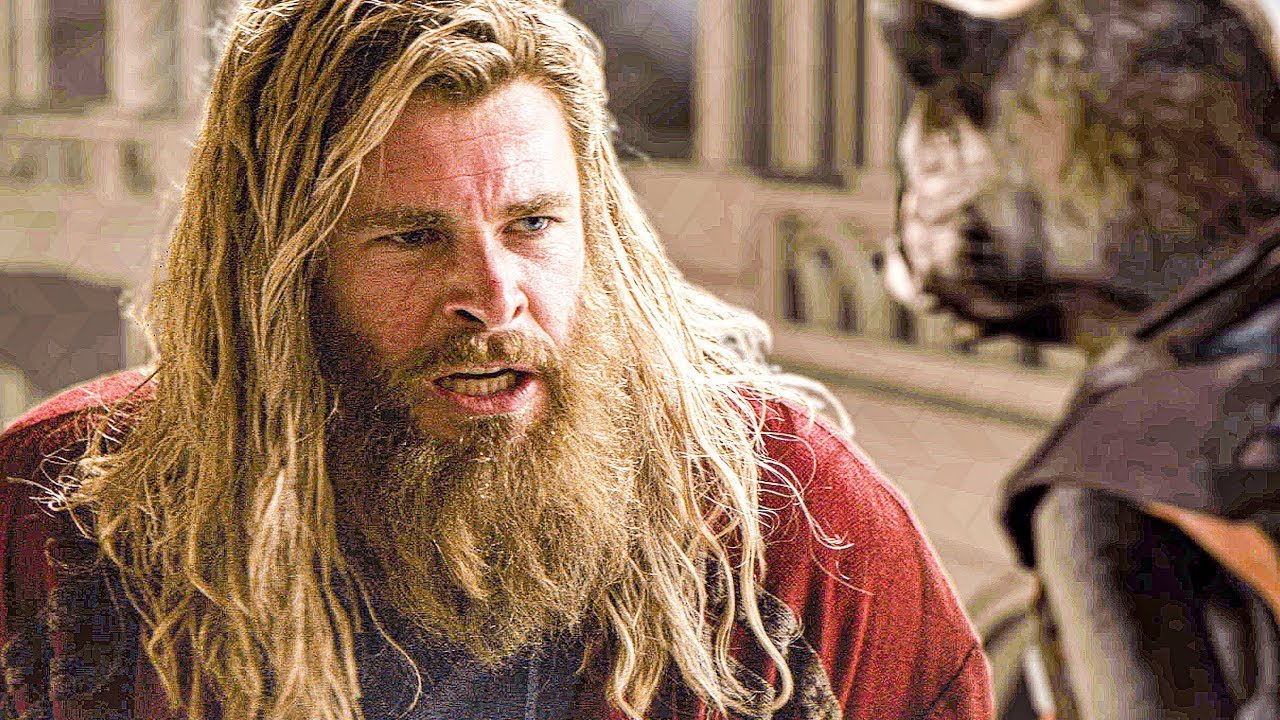



NAME --> Chris Hemsworth


In [0]:
img2 = cv2.imread("Data/Test/chrisendgame.jpg")
cv2_imshow(img2)
print("\n\nNAME -->",test_model(img2))

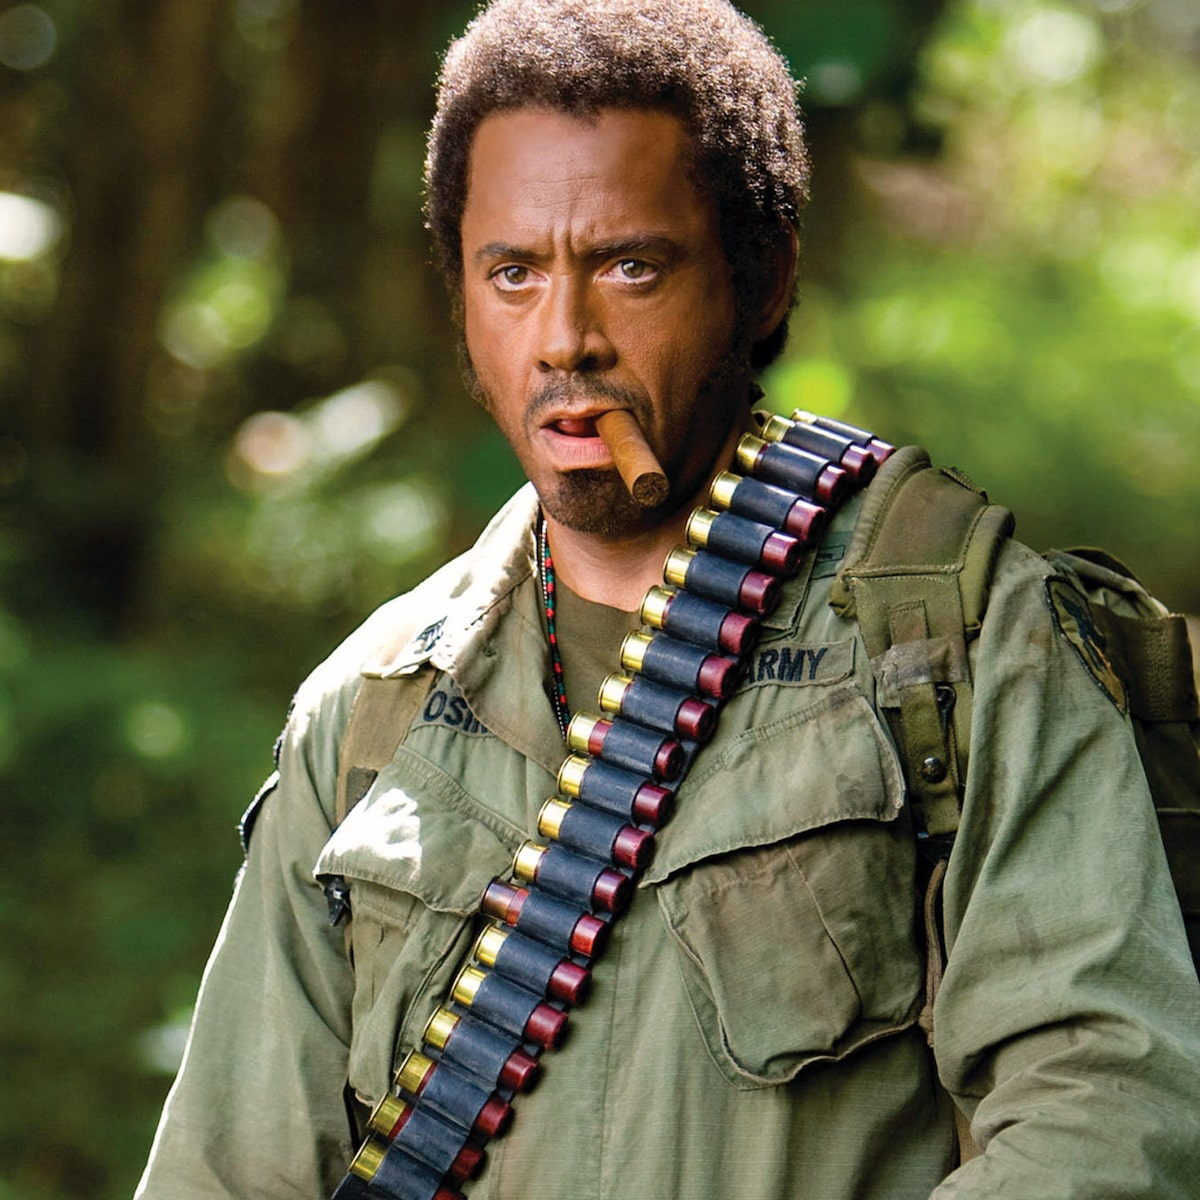



NAME --> Robert Downey, Jr.


In [0]:
img2 = cv2.imread("Data/Test/robertDowneyjr.jpg")
cv2_imshow(img2)
print("\n\nNAME -->",test_model(img2))

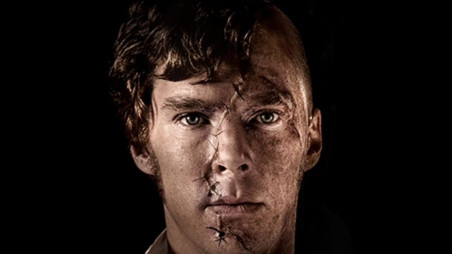



NAME --> Benedict Cumberbatch


In [0]:
img2 = cv2.imread("Data/Test/benedict_cumberbatch.jpg")
cv2_imshow(img2)
print("\n\nNAME -->",test_model(img2))

Thank You